In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
!pip install imblearn

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

# Modelo com classes desbalanceadas

In [27]:
df = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\unbalanced-classes\bank-full.csv",sep=';')

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [30]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Formatando algumas colunas

In [31]:
df['default'] = df['default'].map({'no':0,'yes':1})
df['housing'] = df['housing'].map({'no':0,'yes':1})
df['loan'] = df['loan'].map({'no':0,'yes':1})
df['y'] = df['y'].map({'no':0,'yes':1})
df.education = df.education.map({'primary':0, 'secondary':1, 'tertiary':2})
df.poutcome = df.poutcome.map({'unknown':0, 'failure':1, 'other':2, 'success':3})
df.contact = df.contact.map({'cellular': 0, 'unknown':1, 'telephone':2})
df.month = pd.to_datetime(df.month, format = '%b').dt.month

## Checando missing values

In [32]:
df.isnull().sum()

age             0
job             0
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

### Removendo missing values

In [34]:
df.dropna(inplace = True)

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0
5,35,management,married,2.0,0,231,1,0,1,5,5,139,1,-1,0,0,0
6,28,management,single,2.0,0,447,1,1,1,5,5,217,1,-1,0,0,0


In [36]:
## Transformando colunas categóricas em numéricas

df = pd.get_dummies(df)

In [37]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1


## Visualizando a distribuição das classes

In [38]:
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

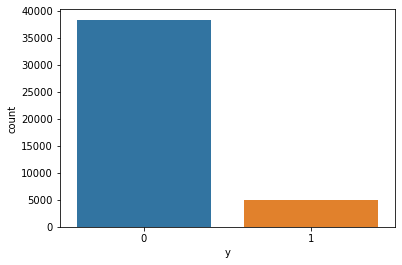

In [39]:
ax = sns.countplot(x='y', data=df)

### Executando um algoritmo Classificador

In [40]:
lr = LogisticRegression()

#### Separa dados e suas classes

In [41]:
x = df.drop('y', axis = 1)
y = df.y

In [43]:
x

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,825,0,0,0,17,11,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,0.0,0,1729,0,0,0,17,11,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,1.0,0,5715,0,0,0,17,11,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,1.0,0,668,0,0,2,17,11,508,...,0,0,0,0,0,0,0,0,1,0


In [44]:
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43354, dtype: int64

#### Separa dados de treino e teste

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, stratify = y)

##### Treina o algorítmo

In [46]:
lr.fit(x_train, y_train)

C:\Users\marcf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Coloca as classificações na variável y_pred

In [47]:
y_pred = lr.predict(x_test)

#### Checa a acurácia do modelo

In [48]:
accuracy_score(y_test, y_pred)

0.8941784297444414

#### Relatório de classificação
- Observando o Recall: o modelo se saiu muito mal na classe 1 pois ele tem poucos dados para treinar

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9580
           1       0.62      0.23      0.34      1259

    accuracy                           0.89     10839
   macro avg       0.76      0.61      0.64     10839
weighted avg       0.87      0.89      0.87     10839



#### Matriz de confusão

In [50]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9403  177   9580
1          970  289   1259
All      10373  466  10839


# Aplicando Nearmiss:
- Método de Undersampling
- Iguala as quantidades de amostras entre as classes

### Instancia o NearMiss

In [51]:
nr = NearMiss()

### Aplicando o NearMiss
- Aplica o NearMiss nos dados para igualar a quantidade de amostras das classes

In [56]:
x,y = nr.fit_resample(x,y)

#### Checa a quantidade de amostras entre as classes

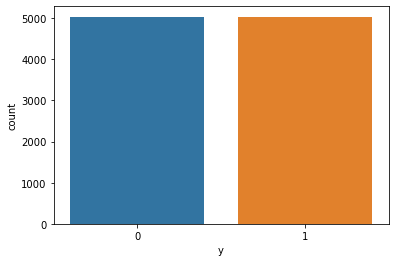

In [57]:
ax = sns.countplot(x=y)

##### Separa em 70% dos dados para treino e 30% para teste

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

In [59]:
x_train

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
8188,36,1.0,0,2843,0,0,0,14,8,186,...,0,0,0,0,0,0,0,1,0,0
6659,43,2.0,0,983,1,0,0,26,2,97,...,0,0,0,0,0,1,0,0,0,1
5081,33,0.0,0,390,1,0,1,9,5,665,...,0,0,0,0,0,0,0,1,0,0
9959,26,2.0,0,3466,0,0,0,6,10,275,...,0,0,0,0,0,1,0,0,0,1
4849,46,1.0,0,430,1,0,0,18,11,91,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,26,1.0,0,668,1,0,1,28,5,576,...,0,0,0,0,1,0,0,0,0,1
3312,43,0.0,0,61,1,0,1,7,5,261,...,0,0,0,0,0,0,0,0,1,0
5434,53,1.0,0,1319,0,0,1,19,6,1318,...,0,0,0,0,1,0,0,0,1,0
515,59,2.0,0,0,0,0,0,8,8,124,...,0,0,0,0,1,0,0,1,0,0


In [63]:
y_train

8188    1
6659    1
5081    1
9959    1
4849    0
       ..
5232    1
3312    0
5434    1
515     0
6477    1
Name: y, Length: 7555, dtype: int64

In [64]:
x_test

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
8465,57,2.0,0,1318,0,0,0,16,10,115,...,0,0,0,0,0,0,0,0,1,0
4995,39,2.0,0,155,0,0,0,19,11,449,...,0,1,0,0,0,0,0,1,0,0
3717,28,1.0,0,58,0,0,1,16,5,136,...,0,0,0,0,1,0,0,0,1,0
6082,53,1.0,0,25,0,0,0,22,8,528,...,0,0,0,0,0,0,0,0,1,0
6955,33,0.0,0,5,1,0,0,17,4,1007,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,33,0.0,0,60,0,0,1,9,5,131,...,0,0,0,0,0,0,0,1,0,0
7105,31,2.0,0,3382,0,0,0,30,4,739,...,0,0,0,0,1,0,0,0,1,0
9453,28,1.0,0,330,0,0,0,2,6,226,...,0,0,0,0,0,0,0,0,1,0
7586,31,2.0,0,2734,1,0,0,15,5,858,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y_test

8465    1
4995    0
3717    0
6082    1
6955    1
       ..
3796    0
7105    1
9453    1
7586    1
9593    1
Name: y, Length: 2519, dtype: int64

#### Instancia o classificador

In [65]:
lr = LogisticRegression()

#### Treina o algoritmo

In [66]:
lr.fit(x_train, y_train)

C:\Users\marcf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Coloca as classificações de predição na variável y_pred

In [67]:
y_pred = lr.predict(x_test)

#### Checa a Acurácia do Modelo com NearMiss

In [70]:
accuracy_score(y_test, y_pred)

0.8717745136959111

#### Recall modelo com NearMiss

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1259
           1       0.89      0.85      0.87      1260

    accuracy                           0.87      2519
   macro avg       0.87      0.87      0.87      2519
weighted avg       0.87      0.87      0.87      2519



#### Matriz de confusão 2 - modelo com NearMiss

In [69]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1128   131  1259
1         192  1068  1260
All      1320  1199  2519


# Aplicando o SMOTE (Synthetic Minority Over-Sampling Technique)
- Gera dados sintéticos de classe minoritária

## Separa os dados e as classes
- **Aqui Vamos repetir esse passo, pois, no teste do NearMiss nós substituímos os dados das variáveis x e y**

In [72]:
x = df.drop('y', axis =1)
y = df.y

## Visualizando a quantidade de dados por classe

In [73]:
np.bincount(y)

array([38317,  5037], dtype=int64)

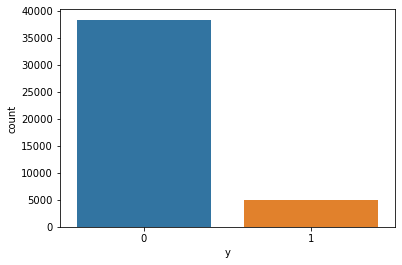

In [74]:
ax = sns.countplot(x=y)

## Instancia o SMOTE

In [75]:
# sampling_strategy=0.5 -> com esse parâmetro podemos definir o limite para o quanto subimos a classe minoritária
smt = SMOTE()

## Aplica o SMOTE nos dados

In [77]:
x, y = smt.fit_resample(x,y)

### Visualizando a distribuição das amostras

In [78]:
np.bincount(y)

array([38317, 38317], dtype=int64)

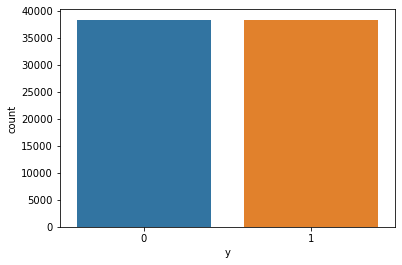

In [79]:
ax = sns.countplot(x=y)

### Separando o treino e teste
- Separa em 70% dos dados para treino e 30% para teste

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

### Instancia o classificador

In [81]:
lr = LogisticRegression()

### Treina o algoritmo

In [83]:
lr.fit(x_train, y_train)

C:\Users\marcf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Coloca as classificações de predição na variável y_pred

In [85]:
y_pred = lr.predict(x_test)

### Checa a acurácia do modelo SMOTE

In [86]:
accuracy_score(y_test, y_pred)

0.8198235816065557

#### Recall do modelo SMOTE

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      9579
           1       0.83      0.80      0.82      9580

    accuracy                           0.82     19159
   macro avg       0.82      0.82      0.82     19159
weighted avg       0.82      0.82      0.82     19159



#### Matriz de confusão do modelo SMOTE

In [90]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        8025  1554   9579
1        1898  7682   9580
All      9923  9236  19159
